In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan,het_white
import warnings

In [3]:
data=pd.read_csv('All Countries and Economies.csv')
new_column_names = {
    'Life expectancy at birth, total (years)': 'Life expectancy at birth, (years)',
    'Net migration': 'Migration, total',
    'GDP per capita (current US$)current US$constant US$current LCUconstant LCU': 'GDP per capita (US$) (dependent variable)'
}
data = data.rename(columns=new_column_names)

In [4]:
data

,Country,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"Life expectancy at birth, (years)","Population, total",Population growth (annual %),"Migration, total",Human Capital Index (HCI) (scale 0-1),GDP (current US$)current US$constant US$current LCUconstant LCU,GDP per capita (US$) (dependent variable),GDP growth (annual %),...,"Annual freshwater withdrawals, total (% of internal resources)","Electricity production from renewable sources, excluding hydroelectric (% of total)",People using safely managed sanitation services (% of population),"Intentional homicides (per 100,000 people)","Central government debt, total (% of GDP)",Statistical performance indicators (SPI): Overall score (scale 0-100),Individuals using the Internet (% of population),Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)",Unnamed: 25
0,afghanistan,NaN,62.0,"41,128,771",2.5,"-183,672",0.4,14.58,363.7,-20.7,...,43,NaN,NaN,4.0,NaN,49.8,18.0,27.0,0.1,NaN
1,albania,0.0,76.0,"2,775,634",-1.3,"-10,612",0.6,18.88,"6,802.80",4.8,...,3,0.0,48.0,2.0,82.4,75.4,79.0,36.0,7.6,NaN
2,algeria,0.5,76.0,"44,903,225",1.6,"-18,797",0.5,191.91,"4,273.90",3.1,...,87,0.1,18.0,2.0,NaN,55.1,71.0,8.0,0,NaN
3,american-samoa,NaN,NaN,"44,273",-1.7,"-1,646",NaN,"709,000,000","15,743.30",-1.9,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,andorra,NaN,NaN,"79,824",1,"1,377",NaN,3.35,"41,992.80",8.8,...,NaN,NaN,100.0,3.0,NaN,NaN,94.0,46.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,virgin-islands-us,NaN,80.0,"105,413",-0.4,-224,NaN,4,"39,552.20",-2.1,...,NaN,NaN,NaN,50.0,NaN,NaN,64.0,NaN,NaN,NaN
213,west-bank-and-gaza,NaN,0.5,73,"5,043,612",2.4,"-12,369",1,19.11,"3,789.30",...,100,43.0,NaN,67.0,1.0,NaN,70.4,75.0,NaN,1.2
214,yemen-rep,19.8,64.0,"33,696,614",2.1,"-101,468",0.4,22,676.90,0.8,...,170,0.0,19.0,6.0,NaN,36.8,27.0,0.0,-1.3,NaN
215,zambia,61.4,61.0,"20,017,675",2.8,"9,015",0.4,29.78,"1,487.90",4.7,...,2,0.0,NaN,5.0,71.2,59.0,21.0,15.0,0.4,NaN


In [5]:
countries_to_remove = []
data=data.drop(['GDP (current US$)current US$constant US$current LCUconstant LCU','Personal remittances, received (% of GDP)','Individuals using the Internet (% of population)','Access to electricity (% of population)','Unnamed: 25','People using safely managed sanitation services (% of population)','Central government debt, total (% of GDP)','Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)','Electricity production from renewable sources, excluding hydroelectric (% of total)','Annual freshwater withdrawals, total (% of internal resources)'],axis=1)

In [6]:
threshold = 1
data = data.dropna(thresh=data.shape[1] - threshold,axis=0)
for index, row in data.iterrows():
    country = row['Country']  
    for col in data.columns[1:]:
        val = row[col]
        if pd.isna(val):
            countries_to_remove.append(country)
data = data[~data['Country'].isin(countries_to_remove)]
data

,Country,"Life expectancy at birth, (years)","Population, total",Population growth (annual %),"Migration, total",Human Capital Index (HCI) (scale 0-1),GDP per capita (US$) (dependent variable),GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)",CO2 emissions (metric tons per capita),Forest area (% of land area),"Intentional homicides (per 100,000 people)",Statistical performance indicators (SPI): Overall score (scale 0-100),Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)"
0,afghanistan,62.0,"41,128,771",2.5,"-183,672",0.4,363.7,-20.7,11.7,2.3,0.2,1.9,4.0,49.8,27.0,0.1
1,albania,76.0,"2,775,634",-1.3,"-10,612",0.6,"6,802.80",4.8,11.8,6.7,1.5,28.8,2.0,75.4,36.0,7.6
2,algeria,76.0,"44,903,225",1.6,"-18,797",0.5,"4,273.90",3.1,11.6,9.3,3.7,0.8,2.0,55.1,8.0,0
5,angola,62.0,"35,588,987",3.1,"29,089",0.4,"2,998.50",3,10.2,25.8,0.6,53.4,4.0,54.9,34.0,-5.8
8,armenia,72.0,"2,780,469",-0.4,"-12,825",0.6,"7,014.20",12.6,12.6,8.6,2.4,11.5,2.0,82.2,36.0,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,vanuatu,70.0,"326,740",2.4,-197,0.5,"3,010.30",1.8,2.1,2.3,0.4,36.3,0.0,40.7,2.0,4.3
211,vietnam,74.0,"98,186,856",0.7,-992,0.7,"4,163.50",8,1.9,3.2,3.7,46.7,2.0,66.0,30.0,4.3
214,yemen-rep,64.0,"33,696,614",2.1,"-101,468",0.4,676.90,0.8,13.6,8.1,0.3,1.0,6.0,36.8,0.0,-1.3
215,zambia,61.0,"20,017,675",2.8,"9,015",0.4,"1,487.90",4.7,6.1,11.0,0.4,60.3,5.0,59.0,15.0,0.4


In [7]:
data=data.replace(',','',regex=True)
data_to_display = data
data = data.drop(columns='Country')
for col in data.columns:
    data[col] = data[col].astype(str).str.replace(',', '')
    data[col] = pd.to_numeric(data[col])

data

,"Life expectancy at birth, (years)","Population, total",Population growth (annual %),"Migration, total",Human Capital Index (HCI) (scale 0-1),GDP per capita (US$) (dependent variable),GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)",CO2 emissions (metric tons per capita),Forest area (% of land area),"Intentional homicides (per 100,000 people)",Statistical performance indicators (SPI): Overall score (scale 0-100),Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)"
0,62.0,41128771.0,2.5,-183672,0.4,363.7,-20.7,11.7,2.3,0.2,1.9,4.0,49.8,27.0,0.1
1,76.0,2775634.0,-1.3,-10612,0.6,6802.8,4.8,11.8,6.7,1.5,28.8,2.0,75.4,36.0,7.6
2,76.0,44903225.0,1.6,-18797,0.5,4273.9,3.1,11.6,9.3,3.7,0.8,2.0,55.1,8.0,0.0
5,62.0,35588987.0,3.1,29089,0.4,2998.5,3.0,10.2,25.8,0.6,53.4,4.0,54.9,34.0,-5.8
8,72.0,2780469.0,-0.4,-12825,0.6,7014.2,12.6,12.6,8.6,2.4,11.5,2.0,82.2,36.0,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,70.0,326740.0,2.4,-197,0.5,3010.3,1.8,2.1,2.3,0.4,36.3,0.0,40.7,2.0,4.3
211,74.0,98186856.0,0.7,-992,0.7,4163.5,8.0,1.9,3.2,3.7,46.7,2.0,66.0,30.0,4.3
214,64.0,33696614.0,2.1,-101468,0.4,676.9,0.8,13.6,8.1,0.3,1.0,6.0,36.8,0.0,-1.3
215,61.0,20017675.0,2.8,9015,0.4,1487.9,4.7,6.1,11.0,0.4,60.3,5.0,59.0,15.0,0.4


In [8]:
print(data.columns)
col_to_exclude = ["GDP per capita (US$) (dependent variable)"]
y=data["GDP per capita (US$) (dependent variable)"]
parameters_data = data.drop(columns=col_to_exclude)
correlation_matrix = parameters_data.corr(method='pearson')
correlation_matrix

Index(['Life expectancy at birth, (years)', 'Population, total',
       'Population growth (annual %)', 'Migration, total',
       'Human Capital Index (HCI) (scale 0-1)',
       'GDP per capita (US$) (dependent variable)', 'GDP growth (annual %)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Inflation, consumer prices (annual %)',
       'CO2 emissions (metric tons per capita)',
       'Forest area (% of land area)',
       'Intentional homicides (per 100,000 people)',
       'Statistical performance indicators (SPI): Overall score (scale 0-100)',
       'Proportion of seats held by women in national parliaments (%)',
       'Foreign direct investment, net inflows (% of GDP)'],
      dtype='object')


,"Life expectancy at birth, (years)","Population, total",Population growth (annual %),"Migration, total",Human Capital Index (HCI) (scale 0-1),GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)",CO2 emissions (metric tons per capita),Forest area (% of land area),"Intentional homicides (per 100,000 people)",Statistical performance indicators (SPI): Overall score (scale 0-100),Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)"
"Life expectancy at birth, (years)",1.000000,-0.092247,-0.275436,-0.213634,0.873021,0.054807,-0.273559,-0.133150,0.526529,0.040692,-0.346187,0.683958,0.217006,0.151296
"Population, total",-0.092247,1.000000,0.041886,0.290279,-0.055118,-0.027720,-0.112759,0.016975,-0.013265,-0.017614,0.069227,0.113694,-0.064527,-0.165230
Population growth (annual %),-0.275436,0.041886,1.000000,0.072510,-0.327914,0.270473,-0.094057,-0.055776,-0.166494,-0.077553,0.011618,-0.309751,0.030310,-0.002818
"Migration, total",-0.213634,0.290279,0.072510,1.000000,-0.104655,-0.005421,-0.021333,0.023625,-0.062302,-0.026838,0.142831,-0.075563,-0.147283,-0.049656
Human Capital Index (HCI) (scale 0-1),0.873021,-0.055118,-0.327914,-0.104655,1.000000,0.023942,-0.291490,-0.137302,0.526901,0.059792,-0.316395,0.799257,0.261598,0.177514
GDP growth (annual %),0.054807,-0.027720,0.270473,-0.005421,0.023942,1.000000,0.002691,-0.165980,0.059168,0.126582,0.067965,-0.008665,0.050856,0.331844
"Unemployment, total (% of total labor force) (modeled ILO estimate)",-0.273559,-0.112759,-0.094057,-0.021333,-0.291490,0.002691,1.000000,0.185656,-0.238880,-0.124109,0.350816,-0.254847,0.001095,0.040077
"Inflation, consumer prices (annual %)",-0.133150,0.016975,-0.055776,0.023625,-0.137302,-0.165980,0.185656,1.000000,-0.132311,-0.085808,-0.060899,-0.110375,-0.120422,-0.083720
CO2 emissions (metric tons per capita),0.526529,-0.013265,-0.166494,-0.062302,0.526901,0.059168,-0.238880,-0.132311,1.000000,-0.200486,-0.209314,0.313418,-0.036759,-0.033265
Forest area (% of land area),0.040692,-0.017614,-0.077553,-0.026838,0.059792,0.126582,-0.124109,-0.085808,-0.200486,1.000000,0.160749,0.053560,0.034148,0.074005


In [9]:
parameters_correlation_with_dependent = data.corr(method='pearson')
parameters_correlation_with_dependent['GDP per capita (US$) (dependent variable)']

Life expectancy at birth, (years)                                        0.689743
Population, total                                                       -0.045267
Population growth (annual %)                                            -0.043346
Migration, total                                                        -0.053219
Human Capital Index (HCI) (scale 0-1)                                    0.697425
GDP per capita (US$) (dependent variable)                                1.000000
GDP growth (annual %)                                                    0.083543
Unemployment, total (% of total labor force) (modeled ILO estimate)     -0.273214
Inflation, consumer prices (annual %)                                   -0.171565
CO2 emissions (metric tons per capita)                                   0.604699
Forest area (% of land area)                                            -0.065355
Intentional homicides (per 100,000 people)                              -0.252983
Statistical perf

In [10]:
variables = data.columns
vif_ = pd.DataFrame()
vif_["Variable"] = variables
vif_["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif_

,Variable,VIF
0,"Life expectancy at birth, (years)",92.918242
1,"Population, total",1.685526
2,Population growth (annual %),1.704395
3,"Migration, total",1.158107
4,Human Capital Index (HCI) (scale 0-1),117.364661
5,GDP per capita (US$) (dependent variable),3.653210
6,GDP growth (annual %),1.697747
7,"Unemployment, total (% of total labor force) (...",3.978568
8,"Inflation, consumer prices (annual %)",1.586061
9,CO2 emissions (metric tons per capita),3.615116


In [11]:
data= data.drop(columns = ['Statistical performance indicators (SPI): Overall score (scale 0-100)','Human Capital Index (HCI) (scale 0-1)','Life expectancy at birth, (years)'])
data

,"Population, total",Population growth (annual %),"Migration, total",GDP per capita (US$) (dependent variable),GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)",CO2 emissions (metric tons per capita),Forest area (% of land area),"Intentional homicides (per 100,000 people)",Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)"
0,41128771.0,2.5,-183672,363.7,-20.7,11.7,2.3,0.2,1.9,4.0,27.0,0.1
1,2775634.0,-1.3,-10612,6802.8,4.8,11.8,6.7,1.5,28.8,2.0,36.0,7.6
2,44903225.0,1.6,-18797,4273.9,3.1,11.6,9.3,3.7,0.8,2.0,8.0,0.0
5,35588987.0,3.1,29089,2998.5,3.0,10.2,25.8,0.6,53.4,4.0,34.0,-5.8
8,2780469.0,-0.4,-12825,7014.2,12.6,12.6,8.6,2.4,11.5,2.0,36.0,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...
209,326740.0,2.4,-197,3010.3,1.8,2.1,2.3,0.4,36.3,0.0,2.0,4.3
211,98186856.0,0.7,-992,4163.5,8.0,1.9,3.2,3.7,46.7,2.0,30.0,4.3
214,33696614.0,2.1,-101468,676.9,0.8,13.6,8.1,0.3,1.0,6.0,0.0,-1.3
215,20017675.0,2.8,9015,1487.9,4.7,6.1,11.0,0.4,60.3,5.0,15.0,0.4


In [12]:
X = data.drop('GDP per capita (US$) (dependent variable)', axis=1)  
y = data['GDP per capita (US$) (dependent variable)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.2962076157961222

In [13]:
def replace_values(value):
    if value > 0:
        return np.log(value)
    elif value < 0:
        return -1 * np.log(abs(value))
    else:
        return 0

log_data = data.map(replace_values)

In [14]:
X = log_data.drop('GDP per capita (US$) (dependent variable)', axis=1)  
y = log_data['GDP per capita (US$) (dependent variable)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_log = LinearRegression()
model_log.fit(X_train, y_train)
score = model_log.score(X_test, y_test)
score

0.8312296269301478

In [15]:
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
X = normalized_data.drop('GDP per capita (US$) (dependent variable)', axis=1)  
y = normalized_data['GDP per capita (US$) (dependent variable)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_norm = LinearRegression()
model_norm.fit(X_train, y_train)
score = model_norm.score(X_test, y_test)
score

0.29620761581765964

In [16]:
new_scaler = StandardScaler()
normalized_data = pd.DataFrame(new_scaler.fit_transform(data), columns=data.columns)
X = normalized_data.drop('GDP per capita (US$) (dependent variable)', axis=1)  
y = normalized_data['GDP per capita (US$) (dependent variable)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_norm = LinearRegression()
model_norm.fit(X_train, y_train)
score = model_norm.score(X_test, y_test)
score

0.2962076158176601

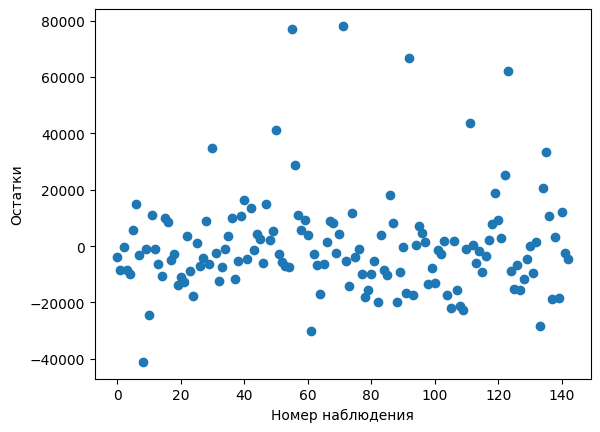

In [17]:
X = data.drop('GDP per capita (US$) (dependent variable)', axis=1)  
y = data['GDP per capita (US$) (dependent variable)']
X = sm.add_constant(X)


model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
plt.scatter(range(len(residuals)), residuals)
plt.xlabel('Номер наблюдения')
plt.ylabel('Остатки')
plt.show()

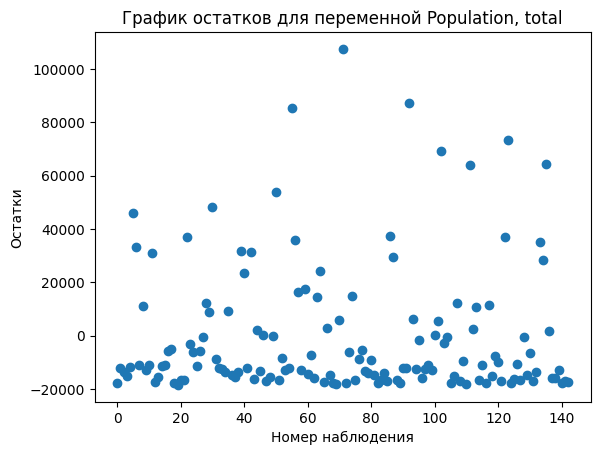

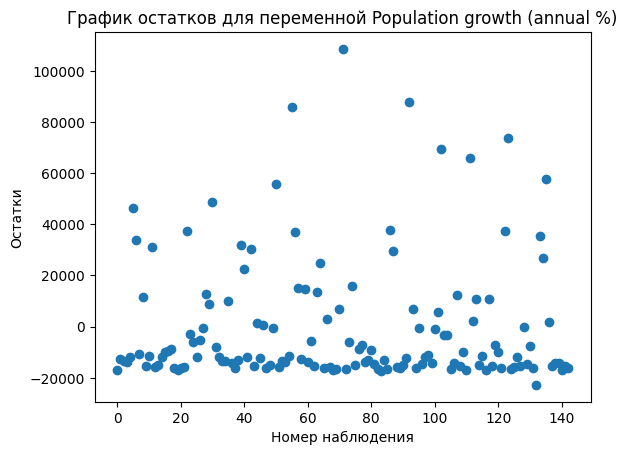

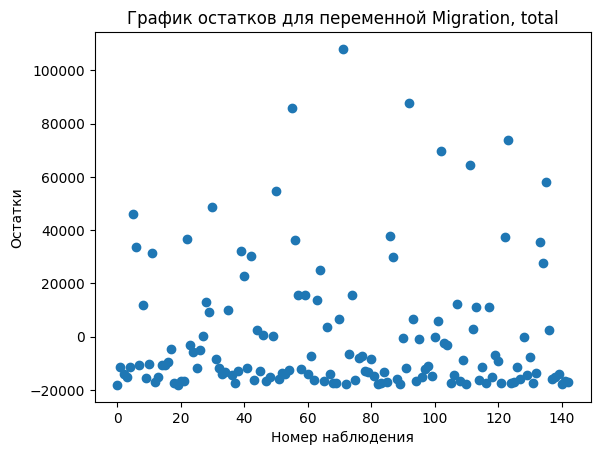

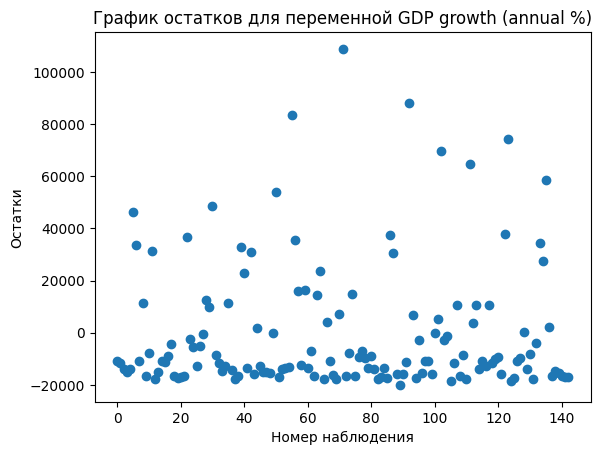

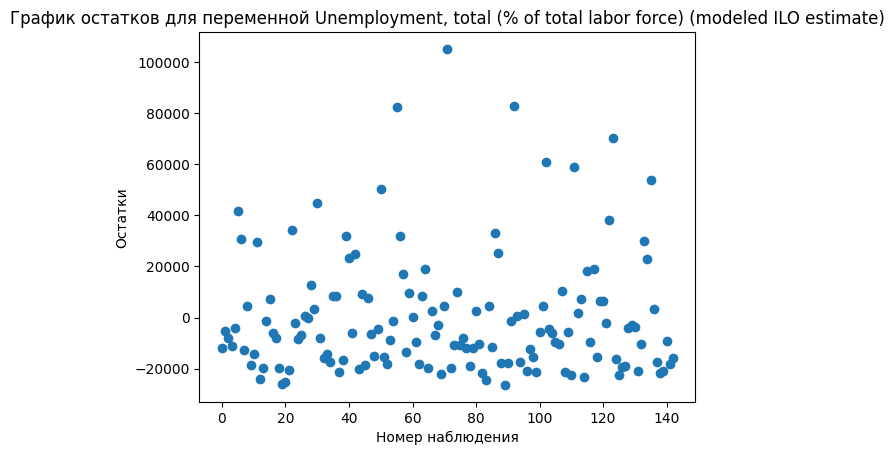

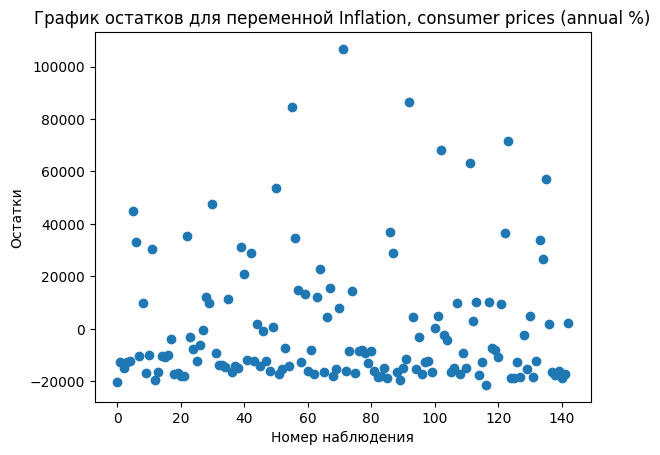

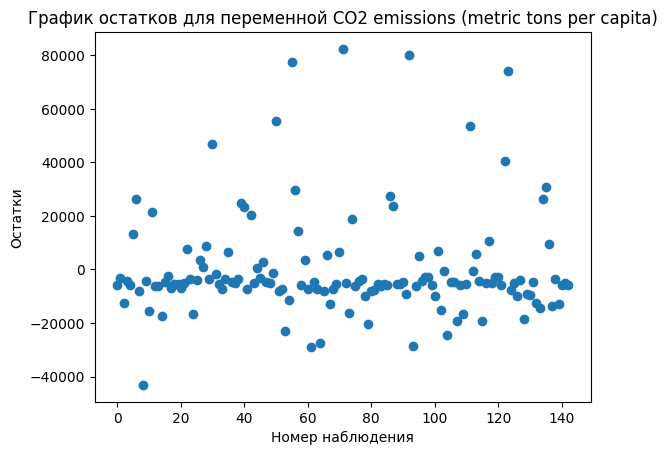

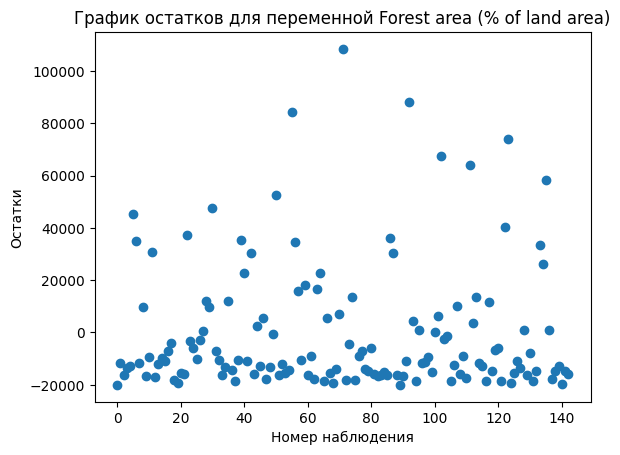

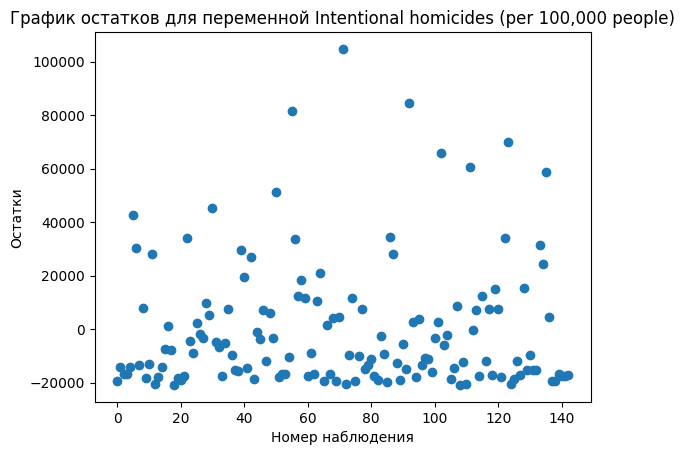

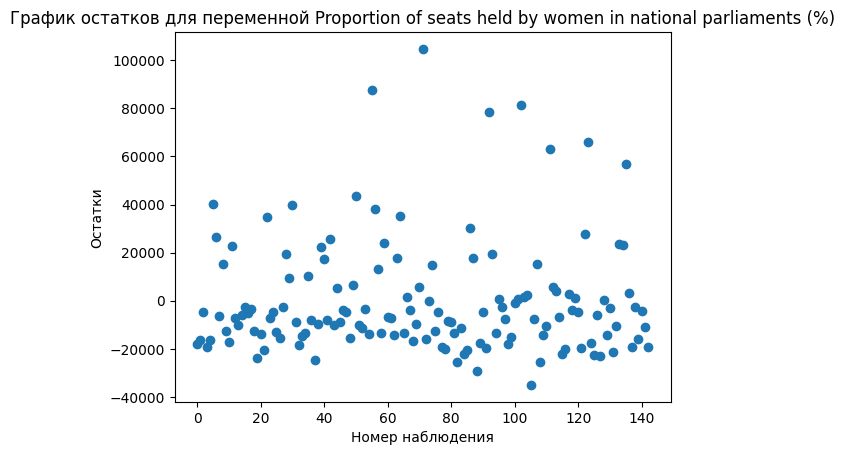

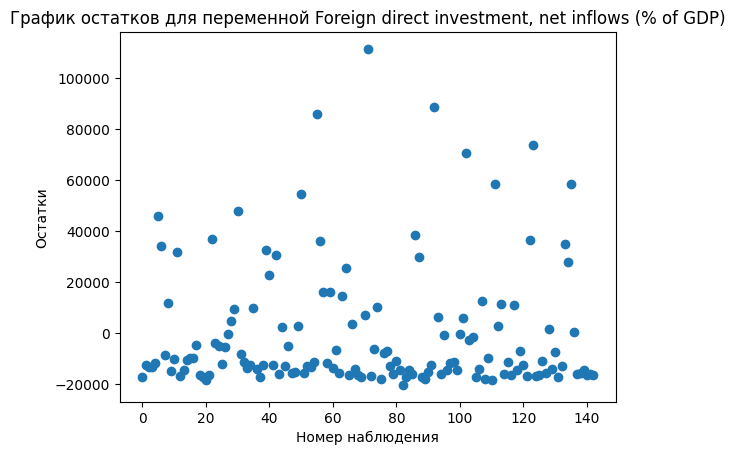

In [18]:
independent_vars = X.columns

for var in independent_vars:
    X_var = X[var]
    
    X_var = sm.add_constant(X_var)
    

    model = sm.OLS(y, X_var)
    results = model.fit()
    residuals = results.resid
    if var!='const':
        plt.scatter(range(len(residuals)), residuals)
        plt.xlabel('Номер наблюдения')
        plt.ylabel('Остатки')
        plt.title(f"График остатков для переменной {var}")
        plt.show()

In [19]:
def detect_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers


outliers_count = {}

for column in data.columns:
    outliers = detect_outliers(data[column])
    if not outliers.empty:
        for index in outliers.index:
            country = data_to_display.loc[index, 'Country']
            if country in outliers_count:
                outliers_count[country] += 1
            else:
                outliers_count[country] = 1

countries_to_remove = []
print("Страны с максимальным количеством выбросов:")
sorted_outliers = sorted(outliers_count.items(), key=lambda x: x[1], reverse=True)
for country, count in sorted_outliers:
    if count>2:
        print(f"Страна: {country}, Количество выбросов: {count}")
        countries_to_remove.append(country)

Страны с максимальным количеством выбросов:
Страна: united-states, Количество выбросов: 4
Страна: lebanon, Количество выбросов: 4
Страна: nigeria, Количество выбросов: 3
Страна: australia, Количество выбросов: 3
Страна: sri-lanka, Количество выбросов: 3
Страна: guyana, Количество выбросов: 3
Страна: south-sudan, Количество выбросов: 3


In [20]:
indices = data_to_display[data_to_display['Country'].isin(countries_to_remove)].index
indices

Index([10, 83, 110, 144, 178, 180, 206], dtype='int64')

In [21]:
new_data = data.drop(index=indices)
new_data

,"Population, total",Population growth (annual %),"Migration, total",GDP per capita (US$) (dependent variable),GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)",CO2 emissions (metric tons per capita),Forest area (% of land area),"Intentional homicides (per 100,000 people)",Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)"
0,41128771.0,2.5,-183672,363.7,-20.7,11.7,2.3,0.2,1.9,4.0,27.0,0.1
1,2775634.0,-1.3,-10612,6802.8,4.8,11.8,6.7,1.5,28.8,2.0,36.0,7.6
2,44903225.0,1.6,-18797,4273.9,3.1,11.6,9.3,3.7,0.8,2.0,8.0,0.0
5,35588987.0,3.1,29089,2998.5,3.0,10.2,25.8,0.6,53.4,4.0,34.0,-5.8
8,2780469.0,-0.4,-12825,7014.2,12.6,12.6,8.6,2.4,11.5,2.0,36.0,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...
209,326740.0,2.4,-197,3010.3,1.8,2.1,2.3,0.4,36.3,0.0,2.0,4.3
211,98186856.0,0.7,-992,4163.5,8.0,1.9,3.2,3.7,46.7,2.0,30.0,4.3
214,33696614.0,2.1,-101468,676.9,0.8,13.6,8.1,0.3,1.0,6.0,0.0,-1.3
215,20017675.0,2.8,9015,1487.9,4.7,6.1,11.0,0.4,60.3,5.0,15.0,0.4


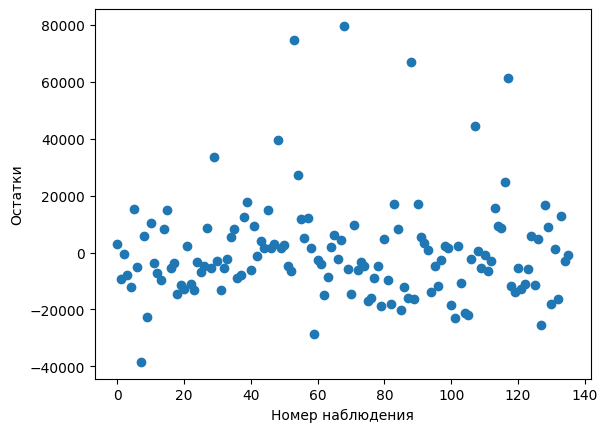

In [22]:
X = new_data.drop('GDP per capita (US$) (dependent variable)', axis=1)  
y = new_data['GDP per capita (US$) (dependent variable)']
X = sm.add_constant(X)


model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
plt.scatter(range(len(residuals)), residuals)
plt.xlabel('Номер наблюдения')
plt.ylabel('Остатки')
plt.show()

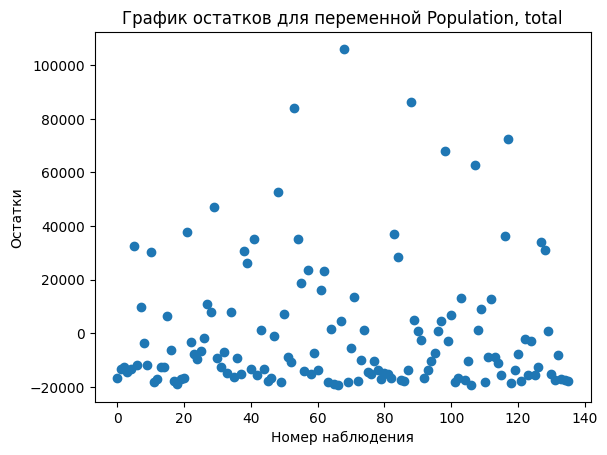

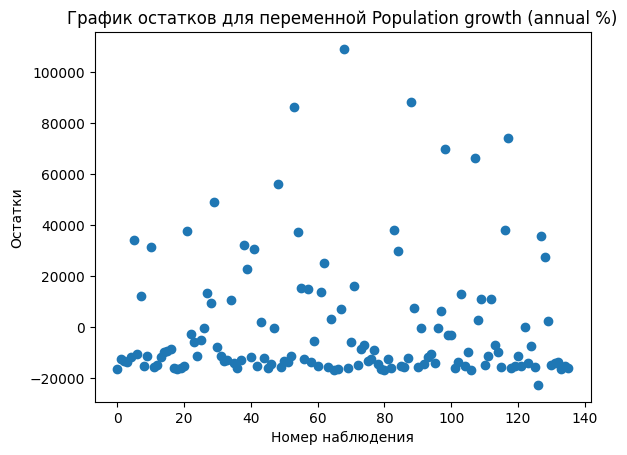

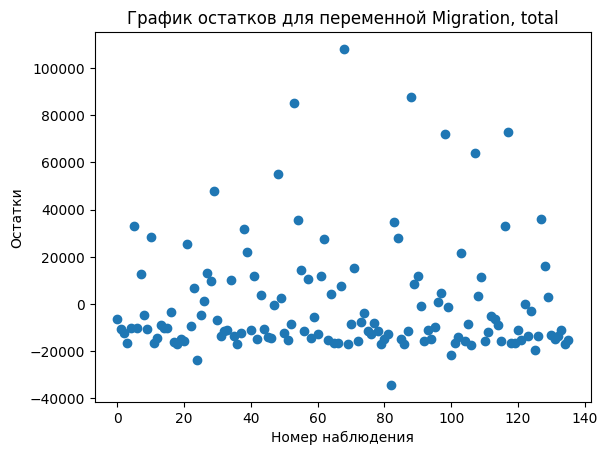

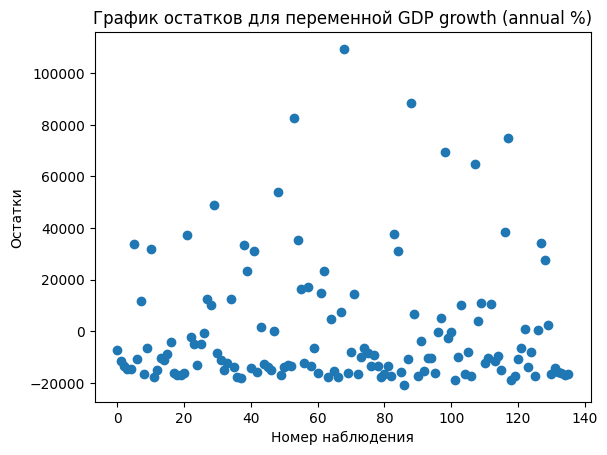

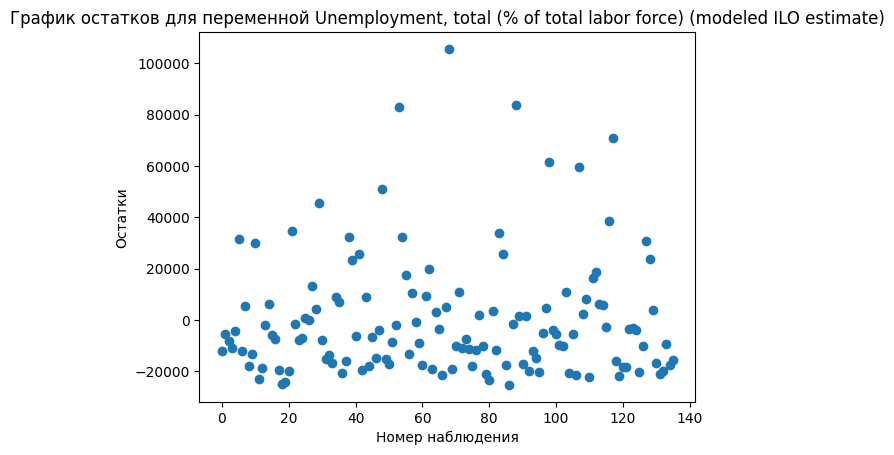

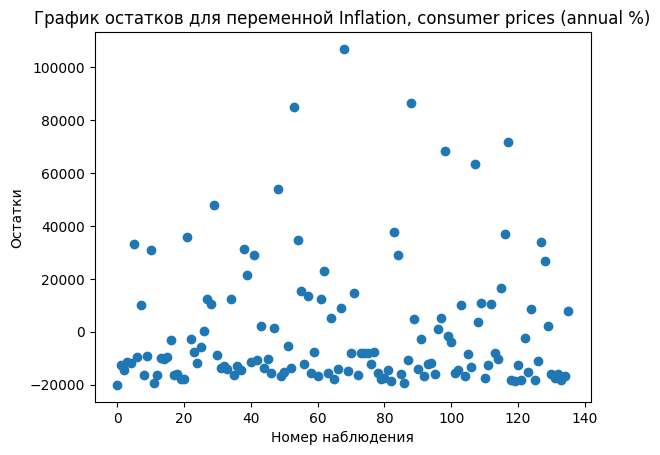

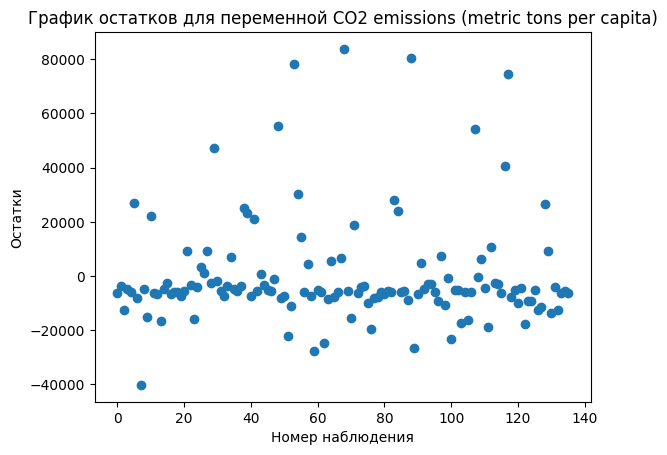

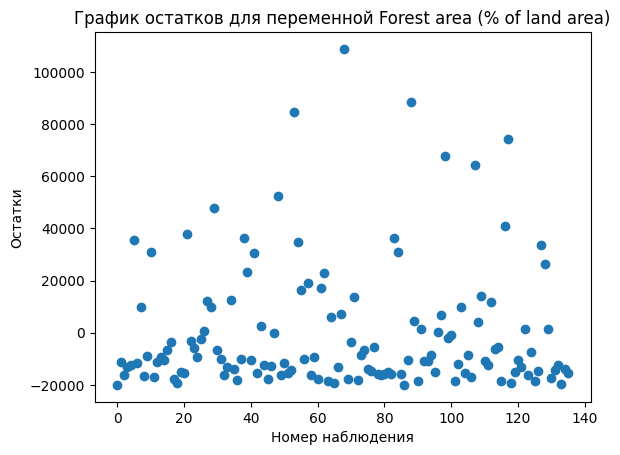

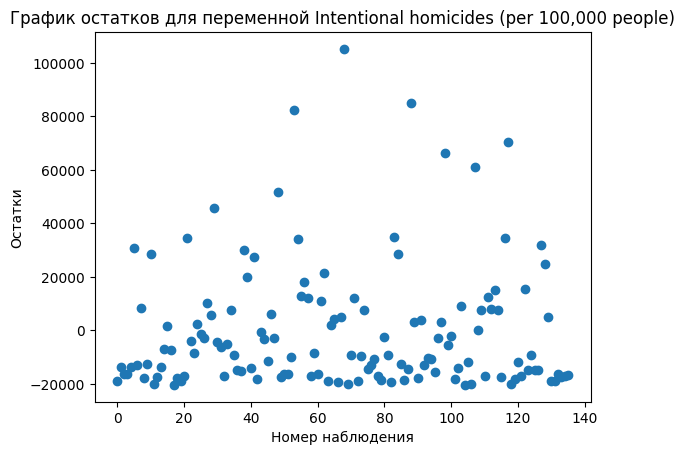

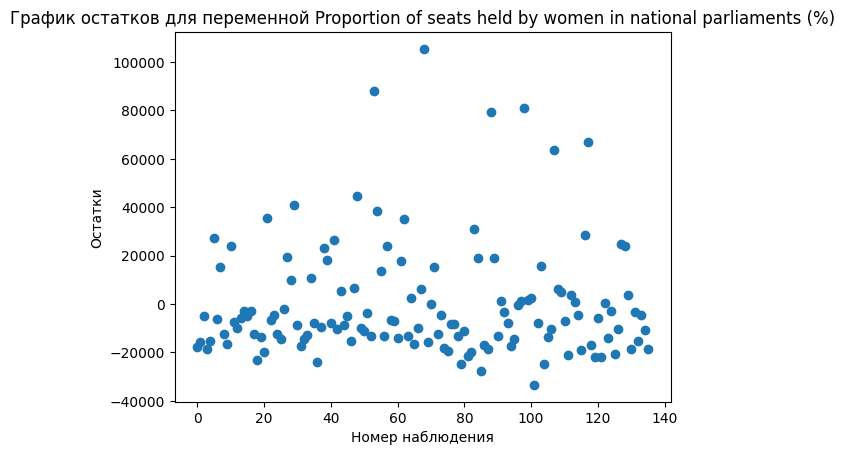

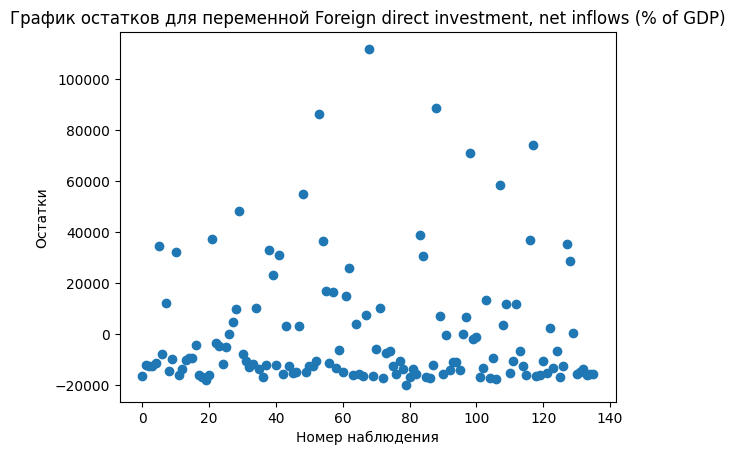

In [23]:

independent_vars = X.columns

for var in independent_vars:
    X_var = X[var]
    
    X_var = sm.add_constant(X_var)
    

    model = sm.OLS(y, X_var)
    results = model.fit()
    residuals = results.resid
    if var!='const':
        plt.scatter(range(len(residuals)), residuals)
        plt.xlabel('Номер наблюдения')
        plt.ylabel('Остатки')
        plt.title(f"График остатков для переменной {var}")
        plt.show()

In [24]:
X = new_data.drop('GDP per capita (US$) (dependent variable)', axis=1)  
y = new_data['GDP per capita (US$) (dependent variable)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.37420789762365736

In [25]:
log_data = new_data.map(replace_values)
X = log_data.drop('GDP per capita (US$) (dependent variable)', axis=1)  
y = log_data['GDP per capita (US$) (dependent variable)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_log = LinearRegression()
model_log.fit(X_train, y_train)
score = model_log.score(X_test, y_test)
score

0.7191064200210606

In [26]:
# Тест Бройша-Пагана и Тест Уайта
x = new_data.drop('GDP per capita (US$) (dependent variable)', axis=1)  
y = new_data['GDP per capita (US$) (dependent variable)']
x = sm.add_constant(x)
model = sm.OLS(y, x)


results = model.fit()

residuals = results.resid
breuschpagan_test= het_breuschpagan(residuals, x)
white_test = het_white(residuals, x)

p_value_b = breuschpagan_test[1]
p_value_w = white_test[1]

print(p_value_b, p_value_w)

0.06113733229058492 0.004765459122166954


In [27]:
robust_results = results.get_robustcov_results(cov_type='HC3')
warnings.filterwarnings("ignore")
print(robust_results.summary())
new_data

                                        OLS Regression Results                                       
Dep. Variable:     GDP per capita (US$) (dependent variable)   R-squared:                       0.471
Model:                                                   OLS   Adj. R-squared:                  0.424
Method:                                        Least Squares   F-statistic:                     8.429
Date:                                       Thu, 09 Nov 2023   Prob (F-statistic):           2.30e-10
Time:                                               19:02:08   Log-Likelihood:                -1522.8
No. Observations:                                        136   AIC:                             3070.
Df Residuals:                                            124   BIC:                             3105.
Df Model:                                                 11                                         
Covariance Type:                                         HC3                      

,"Population, total",Population growth (annual %),"Migration, total",GDP per capita (US$) (dependent variable),GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)",CO2 emissions (metric tons per capita),Forest area (% of land area),"Intentional homicides (per 100,000 people)",Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)"
0,41128771.0,2.5,-183672,363.7,-20.7,11.7,2.3,0.2,1.9,4.0,27.0,0.1
1,2775634.0,-1.3,-10612,6802.8,4.8,11.8,6.7,1.5,28.8,2.0,36.0,7.6
2,44903225.0,1.6,-18797,4273.9,3.1,11.6,9.3,3.7,0.8,2.0,8.0,0.0
5,35588987.0,3.1,29089,2998.5,3.0,10.2,25.8,0.6,53.4,4.0,34.0,-5.8
8,2780469.0,-0.4,-12825,7014.2,12.6,12.6,8.6,2.4,11.5,2.0,36.0,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...
209,326740.0,2.4,-197,3010.3,1.8,2.1,2.3,0.4,36.3,0.0,2.0,4.3
211,98186856.0,0.7,-992,4163.5,8.0,1.9,3.2,3.7,46.7,2.0,30.0,4.3
214,33696614.0,2.1,-101468,676.9,0.8,13.6,8.1,0.3,1.0,6.0,0.0,-1.3
215,20017675.0,2.8,9015,1487.9,4.7,6.1,11.0,0.4,60.3,5.0,15.0,0.4


In [28]:
new_data =  data.drop(columns= ['Proportion of seats held by women in national parliaments (%)','Forest area (% of land area)','Unemployment, total (% of total labor force) (modeled ILO estimate)'])


In [29]:
X = new_data.drop('GDP per capita (US$) (dependent variable)', axis=1)
y = new_data['GDP per capita (US$) (dependent variable)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit(cov_type='HC3')
y_pred = model.predict(X_test)
rsquared = model.rsquared
rsquared

0.6051708096411431

In [30]:
log_data = new_data.map(replace_values)
X = log_data.drop('GDP per capita (US$) (dependent variable)', axis=1)
y = log_data['GDP per capita (US$) (dependent variable)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit(cov_type='HC3')
y_pred = model.predict(X_test)
rsquared = model.rsquared
print(rsquared)
coefficients = model.params
print(coefficients)
print(model.summary())

0.9785872101878553
Population, total                                    0.468714
Population growth (annual %)                         0.205361
Migration, total                                     0.009663
GDP growth (annual %)                                0.031605
Inflation, consumer prices (annual %)                0.056760
CO2 emissions (metric tons per capita)               1.071593
Intentional homicides (per 100,000 people)           0.045089
Foreign direct investment, net inflows (% of GDP)    0.282027
dtype: float64
                                            OLS Regression Results                                            
Dep. Variable:     GDP per capita (US$) (dependent variable)   R-squared (uncentered):                   0.979
Model:                                                   OLS   Adj. R-squared (uncentered):              0.977
Method:                                        Least Squares   F-statistic:                              824.7
Date:                     

In [31]:
log_data = new_data.map(replace_values)
X = log_data.drop('GDP per capita (US$) (dependent variable)', axis=1)
X = sm.add_constant(X, prepend=True)
y = log_data['GDP per capita (US$) (dependent variable)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit(cov_type='HC3')
y_pred = model.predict(X_test)
rsquared = model.rsquared
print(rsquared)
coefficients = model.params
print(coefficients)
print(model.summary())

0.8021891604143574
const                                                9.390833
Population, total                                   -0.048423
Population growth (annual %)                         0.019347
Migration, total                                     0.039309
GDP growth (annual %)                                0.032077
Inflation, consumer prices (annual %)               -0.094482
CO2 emissions (metric tons per capita)               0.752944
Intentional homicides (per 100,000 people)          -0.108442
Foreign direct investment, net inflows (% of GDP)    0.108672
dtype: float64
                                        OLS Regression Results                                       
Dep. Variable:     GDP per capita (US$) (dependent variable)   R-squared:                       0.802
Model:                                                   OLS   Adj. R-squared:                  0.787
Method:                                        Least Squares   F-statistic:                     62.45


In [32]:
X = new_data.drop('GDP per capita (US$) (dependent variable)', axis=1)  
y = new_data['GDP per capita (US$) (dependent variable)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_model = Lasso(alpha=0.2)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
score = lasso_model.score(X_test,y_test)
score

0.37155956859437766

In [33]:
X = new_data.drop('GDP per capita (US$) (dependent variable)', axis=1)  
y = new_data['GDP per capita (US$) (dependent variable)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=0.2)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
score = ridge_model.score(X_test,y_test)
score

0.3715588108143023

In [36]:
log_data = new_data.map(replace_values)
X = log_data.drop('GDP per capita (US$) (dependent variable)', axis=1)  
y = log_data['GDP per capita (US$) (dependent variable)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_model = Lasso(alpha=0.2)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
score = lasso_model.score(X_test,y_test)
print(score)
coefficients = list(zip(X.columns, lasso_model.coef_))

for feature, coeff in coefficients:
    print(f"{feature}: {coeff}")

0.8164668827435873
Population, total: -0.03467746504050476
Population growth (annual %): -0.0
Migration, total: 0.04096136435855126
GDP growth (annual %): 0.0
Inflation, consumer prices (annual %): -0.0
CO2 emissions (metric tons per capita): 0.682202920847095
Intentional homicides (per 100,000 people): -0.0
Foreign direct investment, net inflows (% of GDP): 0.009962420283031105


In [41]:
log_data = new_data.map(replace_values)
X = log_data.drop('GDP per capita (US$) (dependent variable)', axis=1)  
y = log_data['GDP per capita (US$) (dependent variable)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=0.2)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
score = ridge_model.score(X_test,y_test)
print(f"R^2:{score}")
coefficients = list(zip(X.columns, ridge_model.coef_))

for feature, coeff in coefficients:
    print(f"{feature}: {coeff}")
mse = np.mean((y_pred_ridge - y_test) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_pred_ridge - y_test))
print("\nMean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R^2:0.8346480757422984
Population, total: -0.048514024831435146
Population growth (annual %): 0.018714968575976446
Migration, total: 0.039358931711342596
GDP growth (annual %): 0.032329714798717074
Inflation, consumer prices (annual %): -0.09431731470019043
CO2 emissions (metric tons per capita): 0.7516787920806346
Intentional homicides (per 100,000 people): -0.10875176189053819
Foreign direct investment, net inflows (% of GDP): 0.10863780697978576

Mean Squared Error (MSE): 0.43313592436961973
Root Mean Squared Error (RMSE): 0.6581306286518047
Mean Absolute Error (MAE): 0.5287492408066616
